In [22]:
import scvelo as scv
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import loompy
import numpy as np
import pandas as pd

In [2]:
top_dir = "/home/owenwhitley/projects/su2c_v2"
preproc_dir = os.path.join(top_dir, 'data/preprocessed/scRNA/velocyto_GBM_GSCs_split_by_sample_no_G800_L')
loom_file = os.path.join(preproc_dir, 'GSCs_GBM_combined_PCA_full.loom')

In [3]:
scv.logging.print_version()
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
# scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

Running scvelo 0.2.2 (python 3.8.5) on 2020-09-02 15:22.


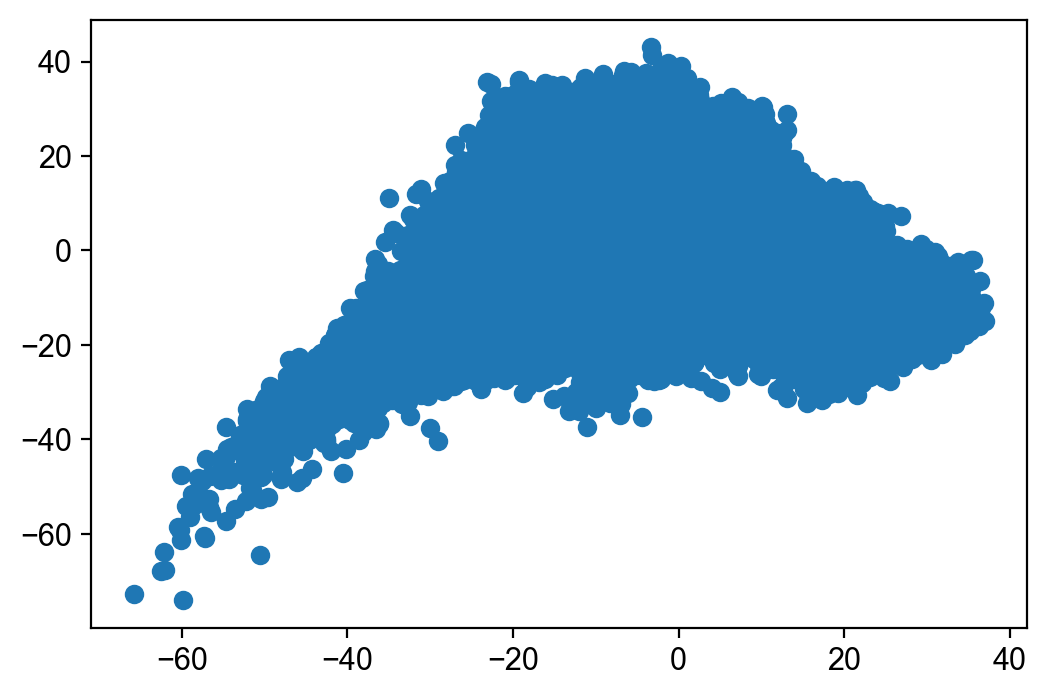

In [4]:
loom_con = loompy.connect(loom_file)
plt.scatter(loom_con.ca['PC1'], loom_con.ca['PC2'])
loom_con.close()

In [5]:
adata = scv.read(loom_file, cache=False)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
adata.var_names_make_unique()

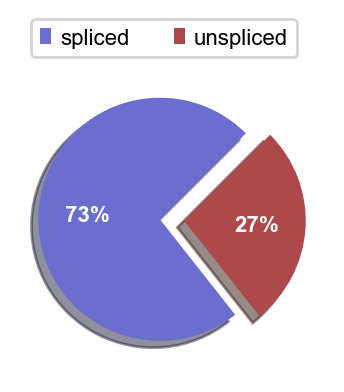

In [7]:
scv.pl.proportions(adata)

In [8]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 45100 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.


In [9]:
scv.tl.velocity(adata)

computing neighbors
    finished (0:00:39) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:08) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:20) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [10]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:04:57) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [11]:
adata.obs

,CC.Difference,Dev_IR_Diff,Dev_IR_Diff_zscore,G2M.Score,Neftel_AC_AUC,Neftel_G1.S_AUC,Neftel_G2.M_AUC,Neftel_MES1_AUC,Neftel_MES2_AUC,Neftel_NPC1_AUC,...,orig.ident,percent.mito,scBTSC_AUC,scGBM_AUC,unique_id,initial_size_spliced,initial_size_unspliced,initial_size,n_counts,velocity_self_transition
G885_L_AACTTTCGTTTACTCT,-0.094683,-0.027116,0.734460,0.346386,0.176188,0.209574,0.087298,0.077837,0.121913,0.087157,...,BTSC,0.066708,0.402406,0.077167,G885_L_AACTTTCGTTTACTCT,17415,5937,17415.0,8846.517578,0.098726
G885_L_ACGGGCTTCGCATGGC,-0.210323,-0.064220,0.324734,0.364562,0.179836,0.094346,0.152643,0.139242,0.124263,0.103834,...,BTSC,0.063602,0.356344,0.071233,G885_L_ACGGGCTTCGCATGGC,19269,5138,19269.0,8964.323242,0.107614
G885_L_AAGGCAGCATAGTAAG,0.157365,-0.055505,0.420975,-0.070514,0.192656,0.106126,0.063530,0.182415,0.123995,0.102103,...,BTSC,0.054650,0.411429,0.074456,G885_L_AAGGCAGCATAGTAAG,17750,3707,17750.0,9242.324219,0.013174
G885_L_ACAGCCGCACGTCAGC,-0.087942,-0.047969,0.504191,0.112628,0.193978,0.064896,0.110305,0.153209,0.143599,0.076541,...,BTSC,0.044132,0.422493,0.063492,G885_L_ACAGCCGCACGTCAGC,15163,4447,15163.0,9354.621094,0.111849
G885_L_ACATCAGTCCTGTAGA,0.322043,-0.009207,0.932221,-0.070117,0.225541,0.115407,0.045049,0.112158,0.120243,0.151350,...,BTSC,0.069577,0.407686,0.091633,G885_L_ACATCAGTCCTGTAGA,11951,4359,11951.0,8928.096680,0.199082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G945-I_L_TTTGTCAGTTCGCTAA,-0.151301,-0.236529,-1.578001,0.138388,0.053953,0.055865,0.137097,0.231774,0.175428,0.055865,...,BTSC,0.190493,0.403689,0.059282,G945-I_L_TTTGTCAGTTCGCTAA,2219,809,2219.0,7779.730957,0.101162
G945-I_L_TTTGCGCCATGTCGAT,0.078827,-0.196677,-1.137933,-0.016065,0.068915,0.089991,0.041711,0.189025,0.112039,0.065512,...,BTSC,0.086214,0.524924,0.051010,G945-I_L_TTTGCGCCATGTCGAT,13526,4034,13526.0,8861.441406,0.149816
G945-I_L_TTTGTCAAGGATGTAT,0.445665,-0.150784,-0.631150,0.125419,0.031933,0.200828,0.089203,0.179242,0.158978,0.046362,...,BTSC,0.027503,0.282643,0.075313,G945-I_L_TTTGTCAAGGATGTAT,1909,797,1909.0,9324.339844,0.126126
G945-I_L_TTTGGTTGTTCGAATC,0.164393,-0.170197,-0.845519,0.055345,0.049248,0.140394,0.060103,0.104194,0.110658,0.019975,...,BTSC,0.081547,0.428550,0.064172,G945-I_L_TTTGGTTGTTCGAATC,1910,1147,1910.0,8863.299805,0.225944


In [28]:
PCA_coords = adata.obs.loc[:, ['PC1', 'PC2']].to_numpy()

In [13]:
adata.obs.keys()

Index(['CC.Difference', 'Dev_IR_Diff', 'Dev_IR_Diff_zscore', 'G2M.Score',
       'Neftel_AC_AUC', 'Neftel_G1.S_AUC', 'Neftel_G2.M_AUC',
       'Neftel_MES1_AUC', 'Neftel_MES2_AUC', 'Neftel_NPC1_AUC',
       ...
       'orig.ident', 'percent.mito', 'scBTSC_AUC', 'scGBM_AUC', 'unique_id',
       'initial_size_spliced', 'initial_size_unspliced', 'initial_size',
       'n_counts', 'velocity_self_transition'],
      dtype='object', length=133)

In [39]:
adata.obsm['DR'] = PCA_coords

Renamed 'DR' to convention 'X_DR' (adata.obsm).
computing velocity embedding
    finished (0:00:22) --> added
    'velocity_DR', embedded velocity vectors (adata.obsm)


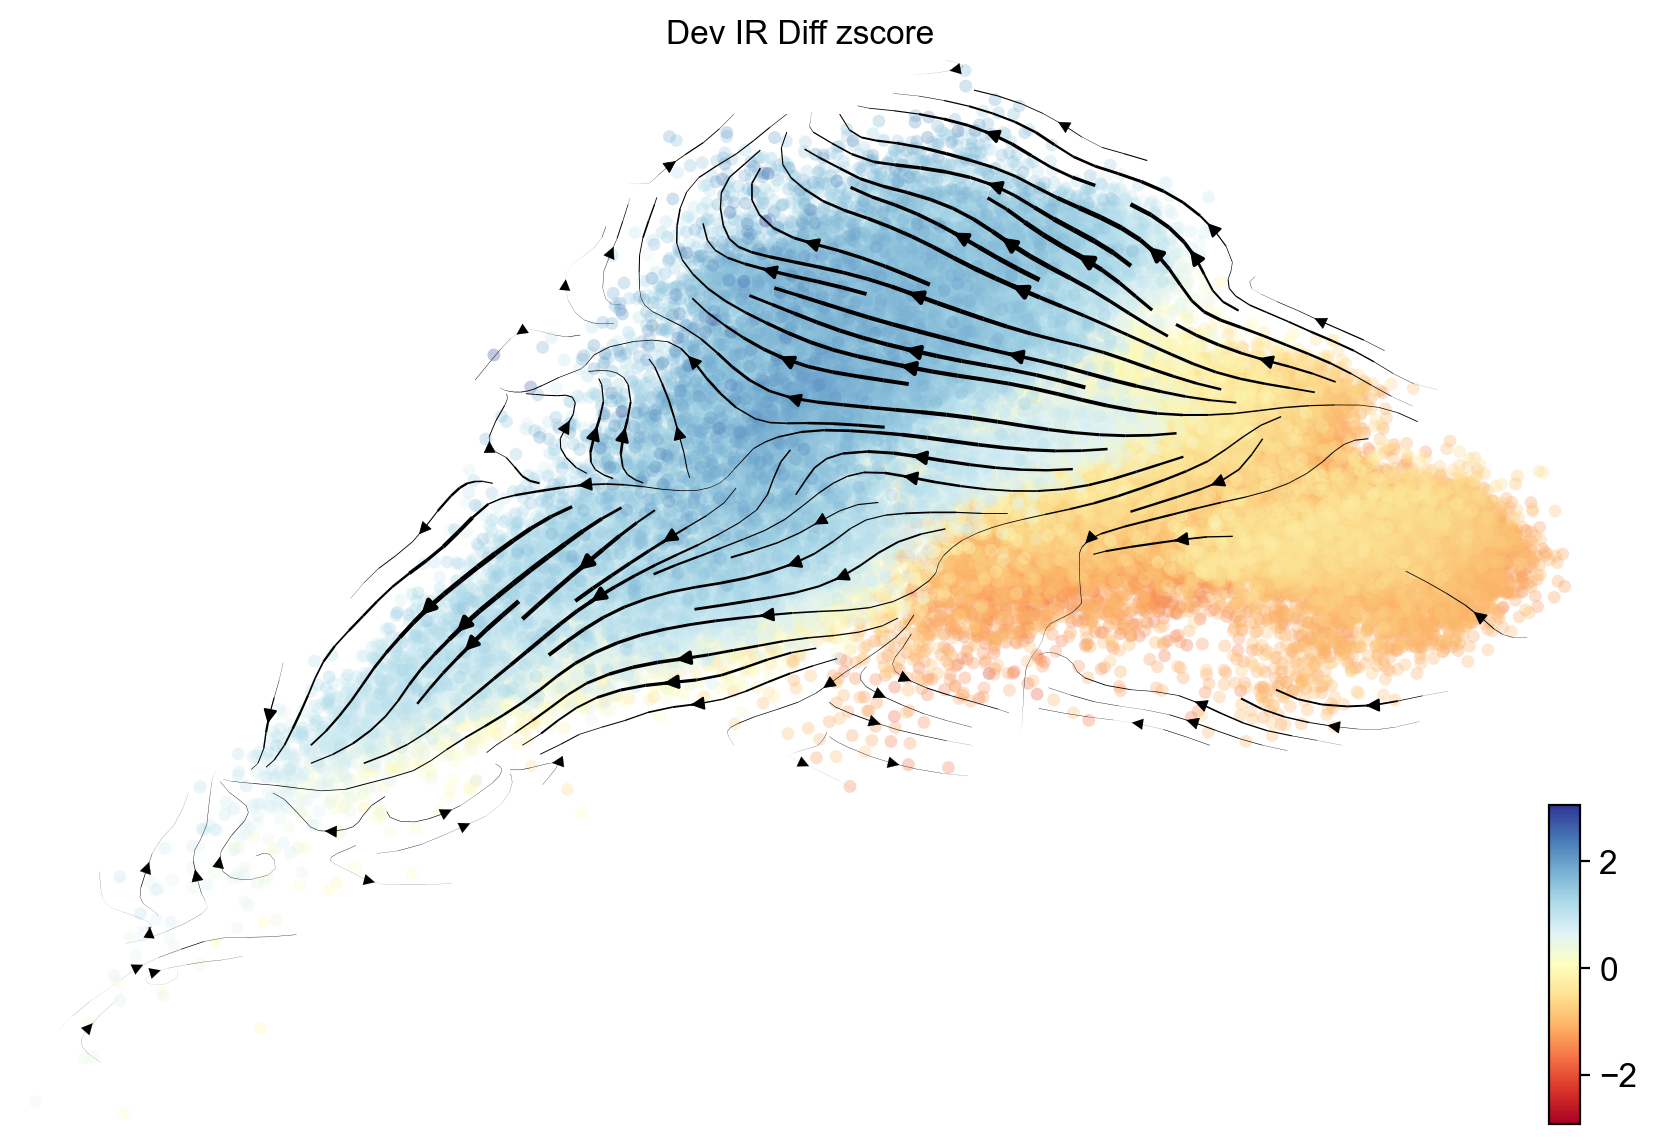

In [40]:
scv.pl.velocity_embedding_stream(adata, basis = 'DR', color = 'Dev_IR_Diff_zscore', figsize = (10, 7),
                                color_map = cm.RdYlBu)

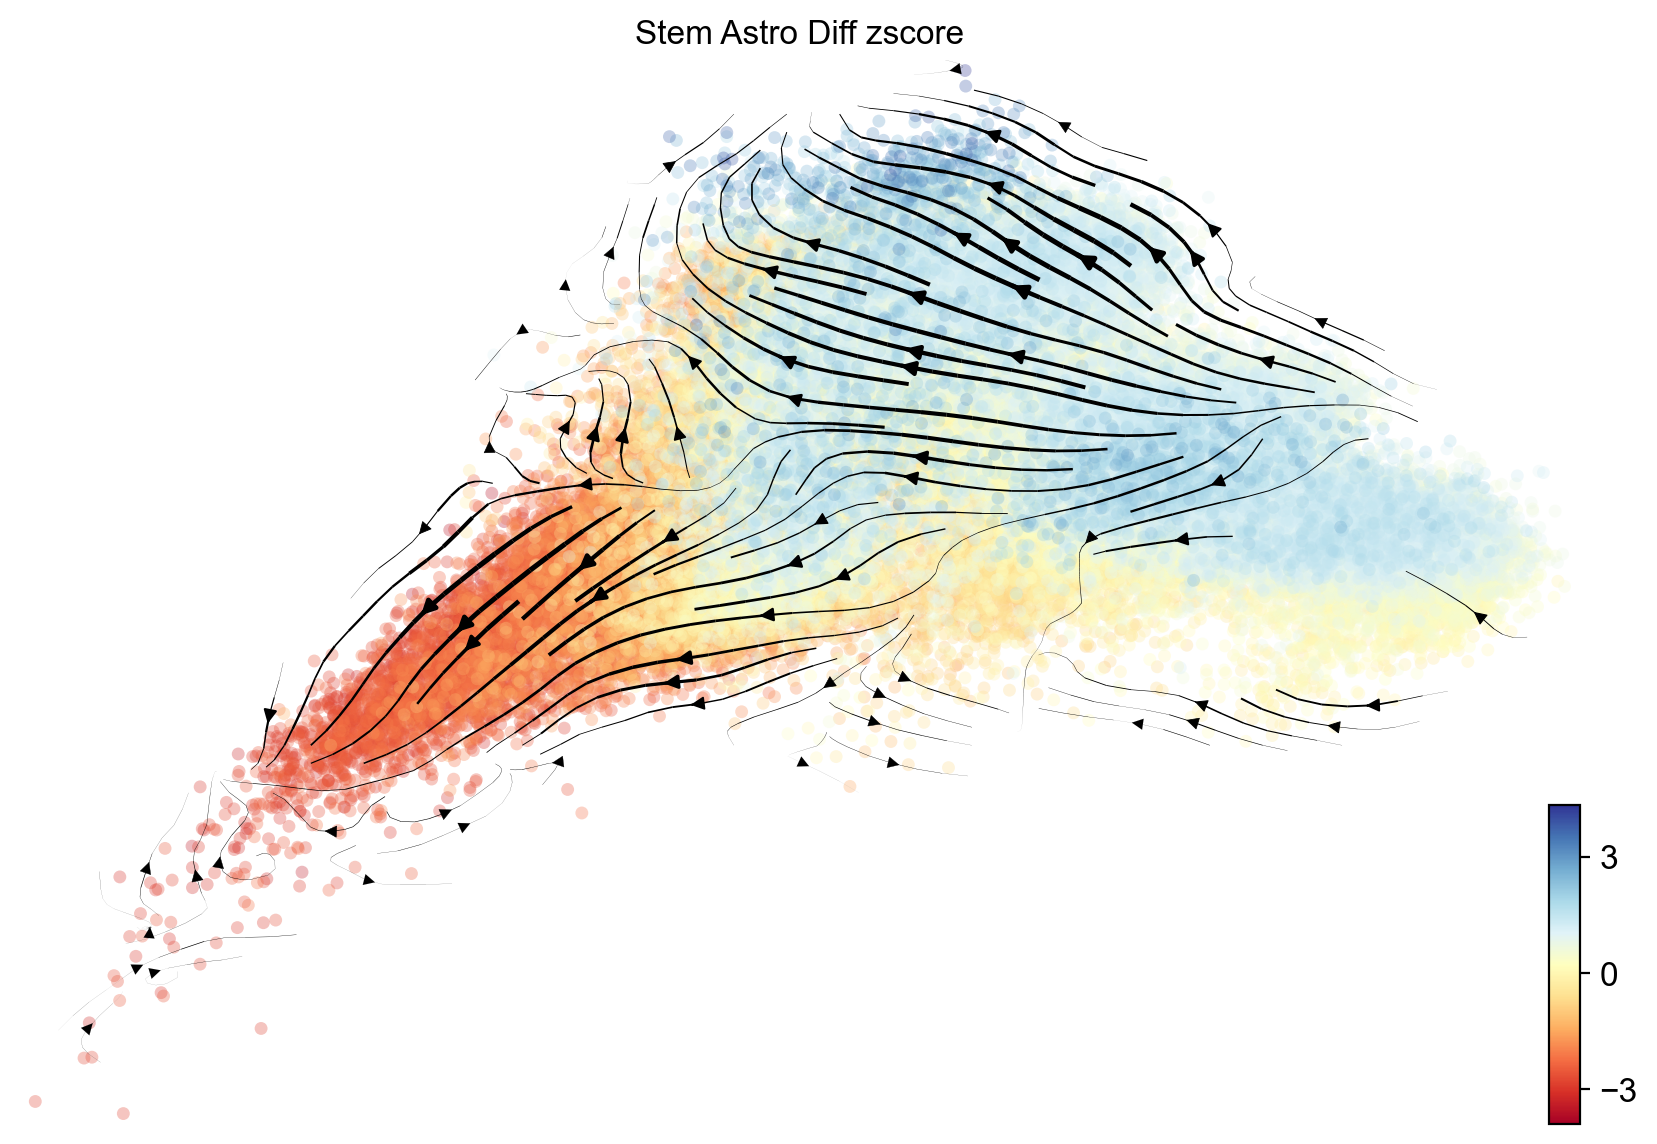

In [41]:
scv.pl.velocity_embedding_stream(adata, basis = 'DR', color = 'Stem_Astro_Diff_zscore', figsize = (10, 7),
                                color_map = cm.RdYlBu)

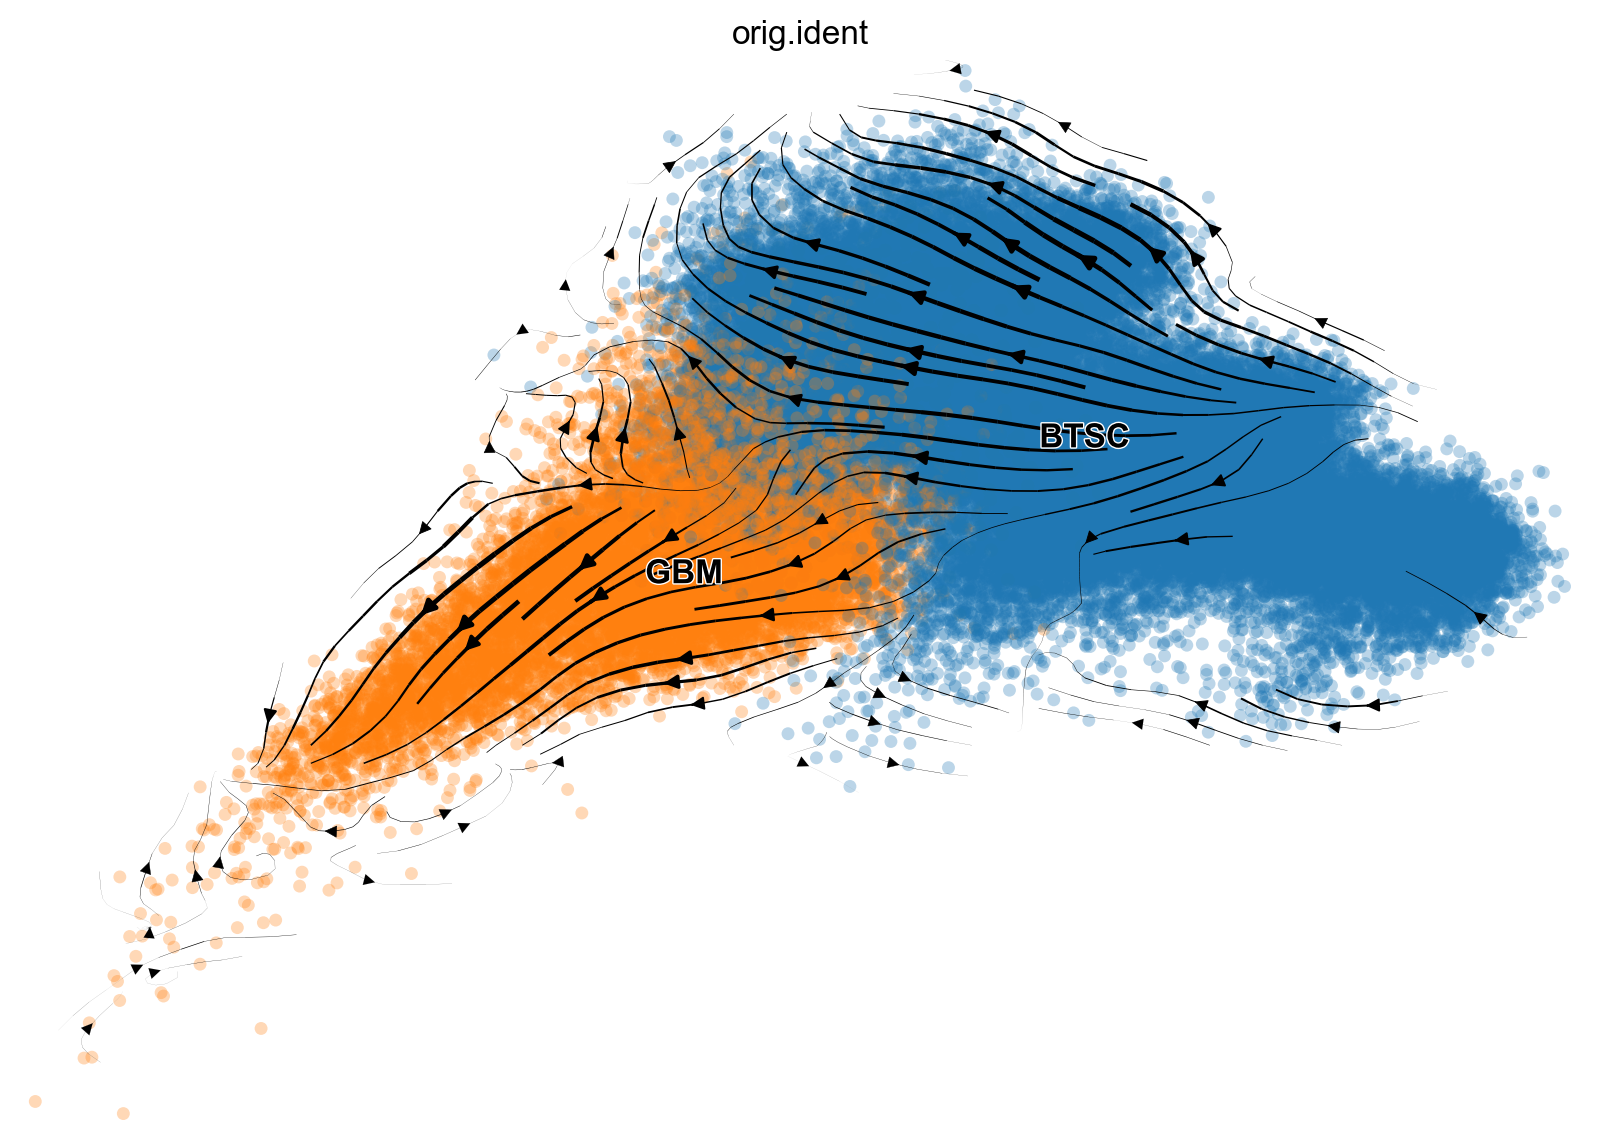

In [42]:
scv.pl.velocity_embedding_stream(adata, basis = 'DR', color = 'orig.ident', figsize = (10, 7))